In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import prepare as pr

### For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.



In [4]:
df = pd.read_csv('sales_stores_items.csv', index_col=0)

In [5]:
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [6]:
df = pr.prep_store_items(df)

In [10]:
df.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday,125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,294.00


In [7]:
df.describe()

,item_id,sale_amount,sale_id,store_id,store_zipcode,item_price,item_upc12,item_upc14,month,sales_total
count,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,9.130000e+05,9.130000e+05,913000.000000,913000.000000
mean,25.500000,52.250287,456500.500000,5.500000,78224.800000,5.160400,2.384688e+11,2.384688e+11,6.523549,280.898866
std,14.430878,28.801144,263560.542223,2.872283,16.479087,2.737764,2.978005e+11,2.978005e+11,3.448535,227.686575
min,1.000000,0.000000,1.000000,1.000000,78201.000000,0.600000,8.500005e+09,8.500005e+09,1.000000,0.000000
25%,13.000000,30.000000,228250.750000,3.000000,78217.000000,2.970000,3.367410e+10,3.367410e+10,4.000000,98.010000
50%,25.500000,47.000000,456500.500000,5.500000,78220.500000,5.195000,7.103651e+10,7.103651e+10,7.000000,233.280000
75%,38.000000,70.000000,684750.250000,8.000000,78232.000000,7.520000,6.030842e+11,6.030842e+11,10.000000,402.780000
max,50.000000,231.000000,913000.000000,10.000000,78253.000000,9.640000,8.846237e+11,8.846237e+11,12.000000,2104.410000


In [8]:
df.shape

(913000, 16)

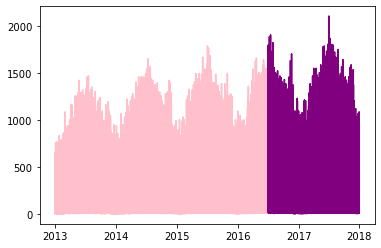

In [12]:
# split using percentage method
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.sales_total, color='pink')
plt.plot(test.index, test.sales_total,color='purple' )

In [13]:
y = train.sales_total

In [14]:
y.head()

sale_date
2013-01-01 00:00:00+00:00     10.92
2013-01-01 00:00:00+00:00    218.40
2013-01-01 00:00:00+00:00    125.55
2013-01-01 00:00:00+00:00    453.60
2013-01-01 00:00:00+00:00    294.00
Name: sales_total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

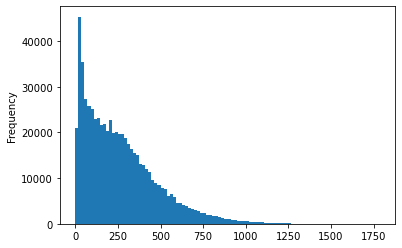

In [18]:
y.plot.hist(bins=100)

[Text(0.5, 1.0, 'Average Total Sales by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Total Sales ($)')]

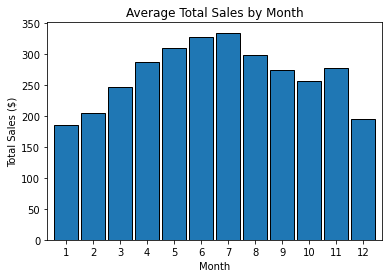

In [19]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Total Sales by Month', xlabel='Month', ylabel='Total Sales ($)')

[Text(0.5, 1.0, 'Average Total Sales by Weekday'),
 Text(0.5, 17.200000000000003, 'Weekday'),
 Text(17.200000000000003, 0.5, 'Total Sales ($)')]

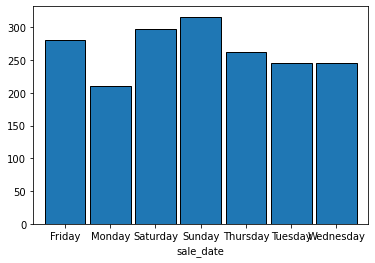

In [20]:
y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Total Sales by Weekday', xlabel='Weekday', ylabel='Total Sales ($)')

<AxesSubplot:xlabel='day_of_week', ylabel='sales_total'>

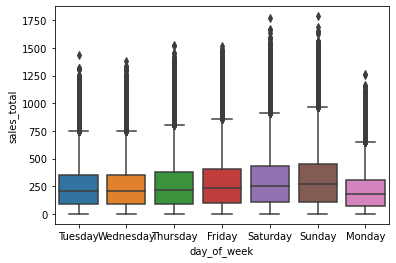

In [31]:
sns.boxplot(data=train, y='sales_total', x='day_of_week')

Text(0.5, 1.0, 'Total Sales over time')

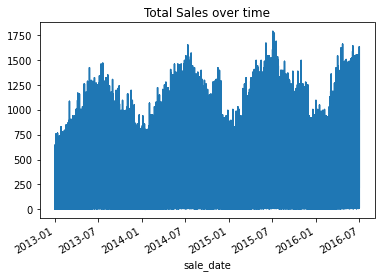

In [34]:
y.plot()
plt.title('Total Sales over time')

<AxesSubplot:xlabel='sale_date'>

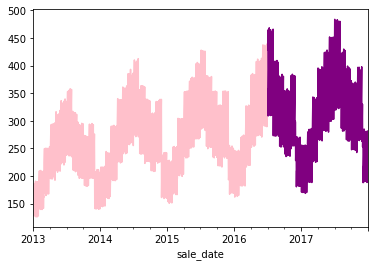

In [40]:
train.resample('D').sales_total.mean().plot(color='pink')
test.resample('D').sales_total.mean().plot(color='purple')

<AxesSubplot:xlabel='sale_date'>

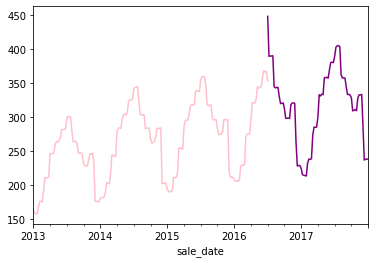

In [39]:
train.resample('W').sales_total.mean().plot(color='pink')
test.resample('W').sales_total.mean().plot(color='purple')

<AxesSubplot:xlabel='sale_date'>

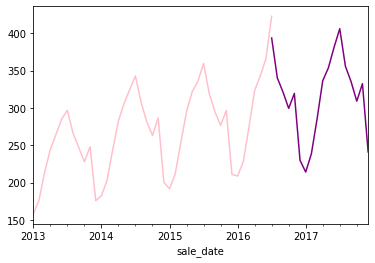

In [38]:
# train.resample('6H').sales_total.mean().plot(title='6 hour average')
train.resample('M').sales_total.mean().plot(color='pink')
test.resample('M').sales_total.mean().plot(color='purple')

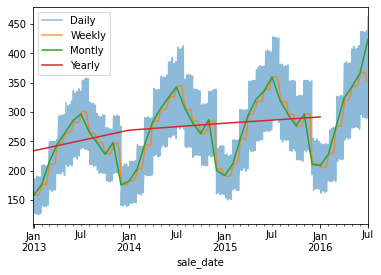

In [42]:
train.resample('D').sales_total.mean().plot(alpha=.5, label='Daily')
train.resample('W').sales_total.mean().plot(alpha=.8, label='Weekly')
train.resample('M').sales_total.mean().plot(label='Montly')
train.resample('Y').sales_total.mean().plot(label='Yearly')
plt.legend()

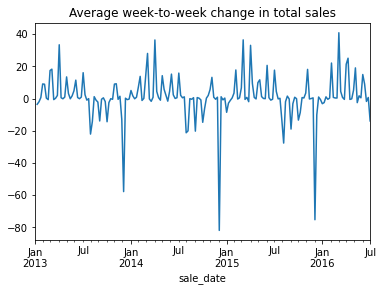

In [47]:
train.resample('W').sales_total.mean().diff().plot(title='Average week-to-week change in total sales')
plt.show()

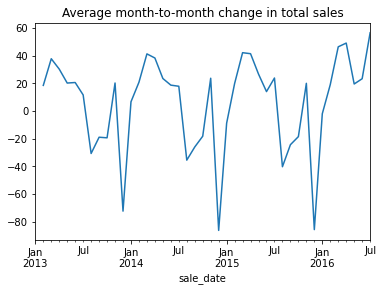

In [46]:
train.resample('M').sales_total.mean().diff().plot(title='Average month-to-month change in total sales')
plt.show()

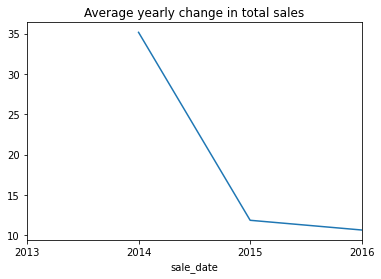

In [49]:
train.resample('Y').sales_total.mean().diff().plot(title='Average yearly change in total sales')
plt.show()

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='sale_date'>

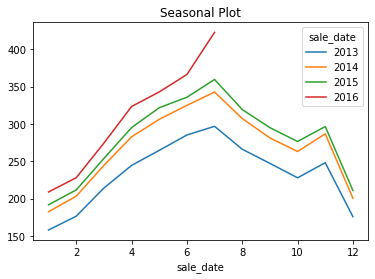

In [48]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')